<a href="https://www.kaggle.com/code/dhiamansourkhouja/logement-encadrement-des-loyers?scriptVersionId=114608537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## L'objectif de ce travaille est l'essai de comprendre la variation des prix de location ainsi que la determination des facteurs dépendants   

In [1]:
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/prix-loyer/logement-encadrement-des-loyers.csv",lineterminator='\n',sep=';')
df.head()

,Année,Secteurs géographiques,Numéro du quartier,Nom du quartier,Nombre de pièces principales,Epoque de construction,Type de location,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Ville,Numéro INSEE du quartier,geo_shape,geo_point_2d\r
0,2020,5,33,Saint-Georges,2,1946-1970,non meublé,23.7,28.44,16.59,PARIS,7510933,"{""coordinates"": [[[2.3392285502760473, 48.8767...","48.879934338782526,2.332850196555468\r"
1,2020,1,28,Gros-Caillou,2,1971-1990,meublé,30.2,36.24,21.14,PARIS,7510728,"{""coordinates"": [[[2.309544250136154, 48.85395...","48.858299903878766,2.3015415556941905\r"
2,2020,2,29,Champs-Elysées,1,Avant 1946,non meublé,32.7,39.24,22.89,PARIS,7510829,"{""coordinates"": [[[2.306463844245763, 48.87014...","48.86707449218534,2.3086516846813985\r"
3,2020,2,34,Chaussée-d'Antin,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510934,"{""coordinates"": [[[2.335450084489445, 48.87683...","48.87354738020909,2.3322688688697006\r"
4,2020,5,35,Faubourg-Montmartre,4,1971-1990,non meublé,21.7,26.04,15.19,PARIS,7510935,"{""coordinates"": [[[2.340255299125085, 48.87660...","48.873934691758095,2.343252579473341\r"


Nous remarquons l'absence de duplicats au niveau de la variable "geo_shape", donc il n'existe pas de données qui décrivent l'évolution d'un loyer du meme bien immobilier au cours du temps .

Nous allons créer une nouvelle variable **ss** qui est catégorielle à partir de la variable "Loyers de référence" pour faciliter la visualisation de certains données

In [3]:
ss = pd.qcut(df['Loyers de référence'], q=3, precision=0)
ss

0        (13.0, 24.0]
1        (27.0, 40.0]
2        (27.0, 40.0]
3        (24.0, 27.0]
4        (13.0, 24.0]
             ...     
10235    (24.0, 27.0]
10236    (27.0, 40.0]
10237    (27.0, 40.0]
10238    (24.0, 27.0]
10239    (27.0, 40.0]
Name: Loyers de référence, Length: 10240, dtype: category
Categories (3, interval[float64, right]): [(13.0, 24.0] < (24.0, 27.0] < (27.0, 40.0]]

In [4]:
print(f"Dataframe dimensions: {df.shape}")


Dataframe dimensions: (10240, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Année                         10240 non-null  int64  
 1   Secteurs géographiques        10240 non-null  int64  
 2   Numéro du quartier            10240 non-null  int64  
 3   Nom du quartier               10240 non-null  object 
 4   Nombre de pièces principales  10240 non-null  int64  
 5   Epoque de construction        10240 non-null  object 
 6   Type de location              10240 non-null  object 
 7   Loyers de référence           10240 non-null  float64
 8   Loyers de référence majorés   10240 non-null  float64
 9   Loyers de référence minorés   10240 non-null  float64
 10  Ville                         10240 non-null  object 
 11  Numéro INSEE du quartier      10240 non-null  int64  
 12  geo_shape                     10240 non-null  object 
      

## Notre jeux de données est constitué par 10240 lignes et 14 colonnes ; avec 8 variables quantitatives et 6 qualitative

In [6]:
res = df.groupby('Secteurs géographiques')['Secteurs géographiques'].count()
print(res)


Secteurs géographiques
1      640
2     1792
3      512
4     1408
5     1024
6      384
7      384
8      128
9      384
10     768
11    1152
12     256
13     896
14     512
Name: Secteurs géographiques, dtype: int64


la variable Secteurs géographiques contient **14** classes dont la répartition intra-classe est balancé, et **80** classes pour le "Numéro INSEE du quartier"/ quartier.En effet, l’Observatoire des loyers parisiens (Olap) a déterminé
14 zones aux niveaux de loyers homogènes. (voir https://leparticulier.lefigaro.fr/upload/docs/application/pdf/2015-10/17756.pdf )

In [7]:
duplicate = df[df.duplicated(['geo_shape', 'geo_point_2d\r'])]
 
print(" Duplicate Rows based on geo_shape &  geo_point_2d\r ")

Nous remarquons l'absence de duplicats au niveau de la variable "geo_shape", donc il n'existe pas de données qui décrivent l'évolution d'un loyer du meme bien immobilier au cours du temps .

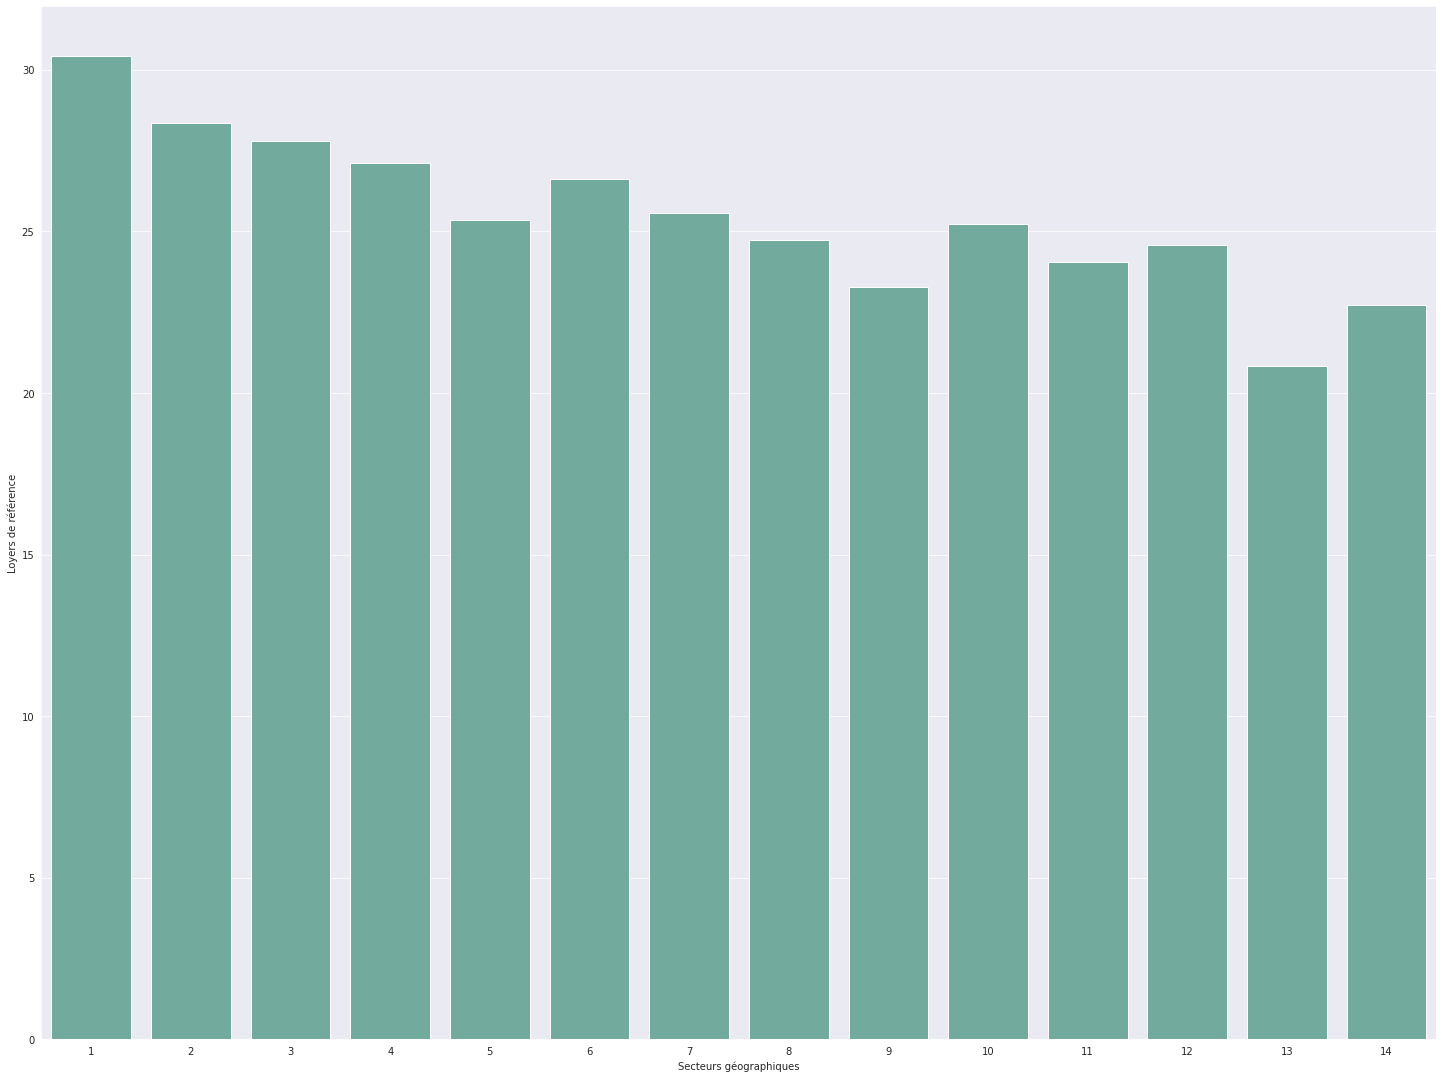

In [8]:
plt.figure(figsize=(25, 19))
sns.barplot(
    x='Secteurs géographiques', 
    y='Loyers de référence', 
    data=df,
 
    ci=None, 
    color='#69b3a2');

En moyenne, les personnes qui habite dans la 1ere zone géographiques payent un loyer plus cher que les personne qui habite dans autres zones .Ceci peut etre expliquer par le fait que le**"secteur géographique" num 1** est dans le coeur de paris ce qui le rend accecible à toute commodité.
La 13eme zone possède le loyer le moins cher.

In [9]:
df.describe()

,Année,Secteurs géographiques,Numéro du quartier,Nombre de pièces principales,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Numéro INSEE du quartier
count,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,1.024000e+04
mean,2020.500000,6.662500,40.500000,2.500000,25.829805,30.996164,18.082487,7.511090e+06
std,1.118089,4.224966,23.093334,1.118089,4.202257,5.042818,2.941352,5.997236e+02
min,2019.000000,1.000000,1.000000,1.000000,14.300000,17.160000,10.010000,7.510101e+06
25%,2019.750000,3.000000,20.750000,1.750000,23.000000,27.600000,16.100000,7.510596e+06
50%,2020.500000,5.000000,40.500000,2.500000,25.500000,30.600000,17.850000,7.511090e+06
75%,2021.250000,11.000000,60.250000,3.250000,28.500000,34.200000,19.950000,7.511585e+06
max,2022.000000,14.000000,80.000000,4.000000,39.600000,47.520000,27.720000,7.512080e+06


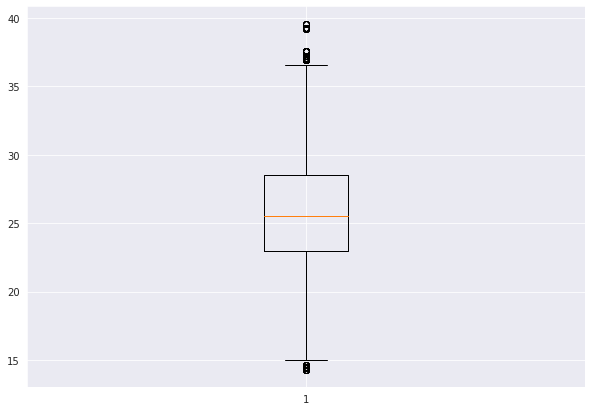

In [10]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df["Loyers de référence"])
 
# show plot
plt.show()

* Le nombre de pièces principales est entre 1 et 4; avec un écart-type de 1.11
* loyer de référence Min =14.30 et le Max= 39.60 avec un écart-type de 4.20
* 25% des locataires payent entre 15 et 23 euro pour mètre carré de surface habitable(1er quantile)
* la mediane de loyer de référence est 25.5
* 50% des locataires payent entre 23 et 28.5 euro(inter quartile)
* 25% des locataires payent entre 28.6 et 36.6 euro pour mètre carré de surface habitable(3eme quantile)
* On remarque aussi la presence de quelque valeurs abérrantes de deux cotés de la boite à moustache qui peuvent etre expliquer par d'autres facteurs (tel que l'approximité des écoles/transport public..)




<AxesSubplot:ylabel='Density'>

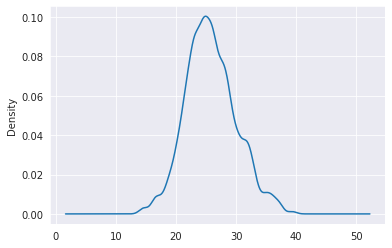

In [11]:
df["Loyers de référence"].plot.kde()

La variable prix de loyer suit presque une loi normale. On testera cette hypthèse à travers des tests statistique.

In [12]:
from scipy.stats import shapiro
stat, p = shapiro(df["Loyers de référence"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print("variable parait Gaussianne (accepté H0)")
else:
 print('variable ne suit pas une loi Gaussiane (rejeté H0)')

Statistics=0.993, p=0.000
variable ne suit pas une loi Gaussiane (rejeté H0)


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La variable prix de loyer ne suit pas une loi normale d'aprés le test statistique

## Relation entre Nombre de pièces principales & prix de loyer

<AxesSubplot:>

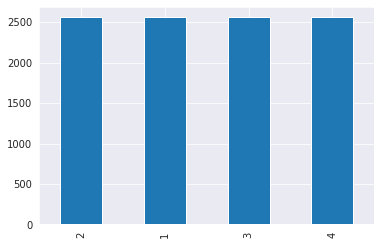

In [13]:
df["Nombre de pièces principales"].value_counts().plot(kind='bar')

Nous remarquons qu'il n'existe pas d'imbalance intra-classe pour la variable **Nombre de pièces principales**.

<AxesSubplot:xlabel='Nombre de pièces principales', ylabel='Loyers de référence'>

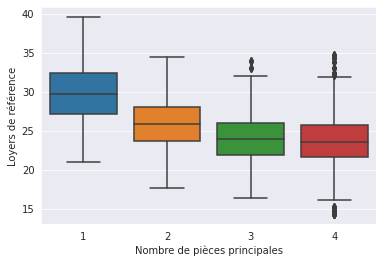

In [14]:
sns.boxplot(x="Nombre de pièces principales", y="Loyers de référence", data=df)

<AxesSubplot:xlabel='Nombre de pièces principales', ylabel='count'>

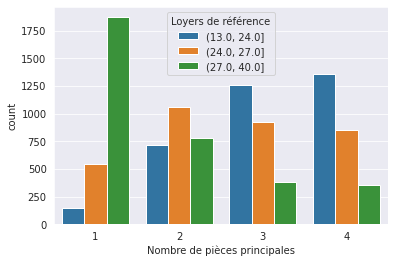

In [15]:
sns.countplot(x='Nombre de pièces principales', hue = ss,data = df)

Nous remarquons que certains Logement qui contient une seule pièce est plus cher que d'autres qui contient plus de pièce. nous remarquons meme que certains logements avec 2 pièces et sont moins cher que ceux qui contient 1 seule pièce.
La présence des outliers au-delà du max pour les prix de location des logements qui contiennent 4 pièces peut être expliqué par l'emplacement de ces logements dans un endroit stratégique(Secteurs géographiques=1 par exp )

Nous allons testez cette observation à travers le calcul de la corrélation entre les deux variables.

In [16]:
from scipy.stats import pearsonr
list1 = df['Loyers de référence']
list2 = df['Nombre de pièces principales']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.552


La corrélation entre les deux variables est modérée.
En effet, il se peut que les logement avec un nombre de pièces mineurs se situent dans un endroit stratégique, de plus on sait que la surface des logements dans les grandes villes est génralement inferieures à celles qui se trouve dans la campagnes par exemple.

### évolution de prix de loyer au cours du temps pour différent type de logement (nombre de pièce principale fixe)

<AxesSubplot:xlabel='Année', ylabel='Loyers de référence'>

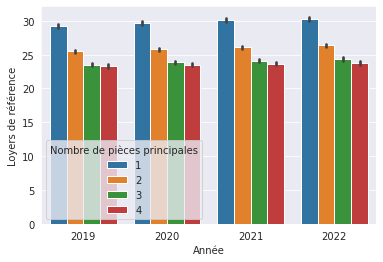

In [17]:
sns.barplot(data=df, y='Loyers de référence', x='Année', hue='Nombre de pièces principales')

On remarque que les prix de différent type de logements augmentent chaque année; ce qui est normal

# l'influence de Type de Location sur le prix de location

<AxesSubplot:xlabel='Type de location', ylabel='Loyers de référence'>

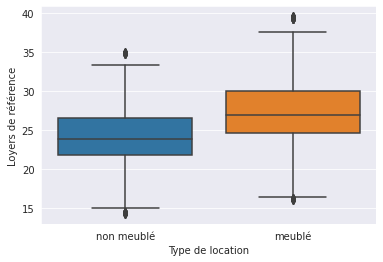

In [18]:
sns.boxplot(x="Type de location", y="Loyers de référence", data=df)

On remarque que les logements non meublé sont moins cher que les autres.
On testera la correlation entre les deux variables à travers un test Anova; puisque la variable "type de location" est qualitative (on peut pas calculer la correlation à travers la méthode de pearson )
* l'hypothese h0 est : il n'existe pas de correlation (cette hypothèse sera rejeté si pvalue≤0.05)
* h1: les deux variables sont correlée (on admet cette hypothèse si pvalue est presque nul)

In [19]:

meub=["Type de location","Loyers de référence"]
dff=df[meub]
dff.head()

,Type de location,Loyers de référence
0,non meublé,23.7
1,meublé,30.2
2,non meublé,32.7
3,meublé,24.5
4,non meublé,21.7


In [20]:
from scipy.stats import f_oneway
CategoryGroupLists=dff.groupby('Type de location')['Loyers de référence'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


Les deux variables Type de location & prix de loyer sont corrélée(comme Pvalue est presque 0)

<AxesSubplot:xlabel='Année', ylabel='Loyers de référence'>

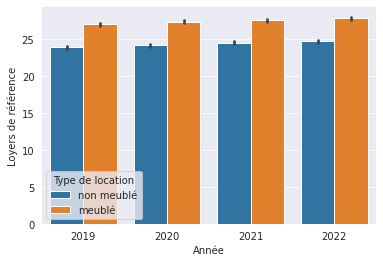

In [21]:
sns.barplot(data=df, y='Loyers de référence', x='Année', hue='Type de location')

<AxesSubplot:xlabel='Année', ylabel='Loyers de référence'>

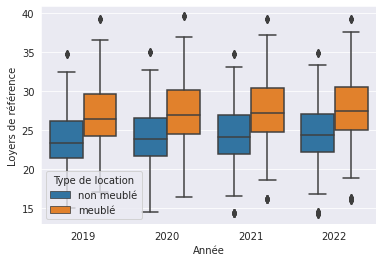

In [22]:
sns.boxplot(data=df, x="Année", y='Loyers de référence', hue='Type de location')

On remarque que l'augmentation des prix de loyers des logements meublés est plus grande que les non meublé; ceci peut être expliqué par l'augmentation des prix des meubles.

## Relation entre Secteurs géographiques et prix de loyer

<AxesSubplot:xlabel='Secteurs géographiques', ylabel='Loyers de référence'>

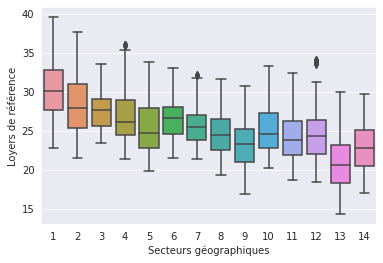

In [23]:
sns.boxplot(x="Secteurs géographiques", y="Loyers de référence", data=df)

* Les prix des loyers les plus chers se trouvent dans les Secteurs géographiques numéro 1 et 2
* Les prix des loyers les moins chers se trouvent dans le Secteur géographique numéro 13

In [24]:
CategoryGroupLists=df.groupby('Secteurs géographiques')['Loyers de référence'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


Les deux variables Secteurs géographiques & prix de loyer sont corrélée. c'est vrai que la variable "Secteurs géographiques" est de type Int mais réellement c'est une variable catégorielle.

## Relation entre Numéro INSEE du quartier et prix de loyer

On peut extraire le code postale de chaque arrondissement de paris à partir de numéro INSEE.
le code postale de 75101 correspond au code postale de 1er arrondissement...

In [25]:
df["code_pos"] = df["Numéro INSEE du quartier"]//100
df.head()

,Année,Secteurs géographiques,Numéro du quartier,Nom du quartier,Nombre de pièces principales,Epoque de construction,Type de location,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Ville,Numéro INSEE du quartier,geo_shape,geo_point_2d\r,code_pos
0,2020,5,33,Saint-Georges,2,1946-1970,non meublé,23.7,28.44,16.59,PARIS,7510933,"{""coordinates"": [[[2.3392285502760473, 48.8767...","48.879934338782526,2.332850196555468\r",75109
1,2020,1,28,Gros-Caillou,2,1971-1990,meublé,30.2,36.24,21.14,PARIS,7510728,"{""coordinates"": [[[2.309544250136154, 48.85395...","48.858299903878766,2.3015415556941905\r",75107
2,2020,2,29,Champs-Elysées,1,Avant 1946,non meublé,32.7,39.24,22.89,PARIS,7510829,"{""coordinates"": [[[2.306463844245763, 48.87014...","48.86707449218534,2.3086516846813985\r",75108
3,2020,2,34,Chaussée-d'Antin,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510934,"{""coordinates"": [[[2.335450084489445, 48.87683...","48.87354738020909,2.3322688688697006\r",75109
4,2020,5,35,Faubourg-Montmartre,4,1971-1990,non meublé,21.7,26.04,15.19,PARIS,7510935,"{""coordinates"": [[[2.340255299125085, 48.87660...","48.873934691758095,2.343252579473341\r",75109


<AxesSubplot:xlabel='code_pos', ylabel='Loyers de référence'>

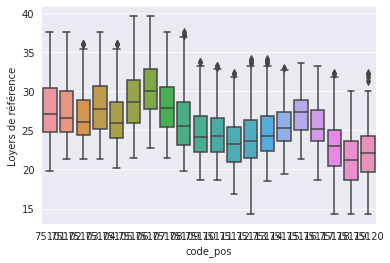

In [26]:
sns.boxplot(x="code_pos", y="Loyers de référence", data=df)

* Le loyer le moins cher se trouve au 19ème arrondissement
* Le loyer le plus cher se trouve au 7ème arrondissement

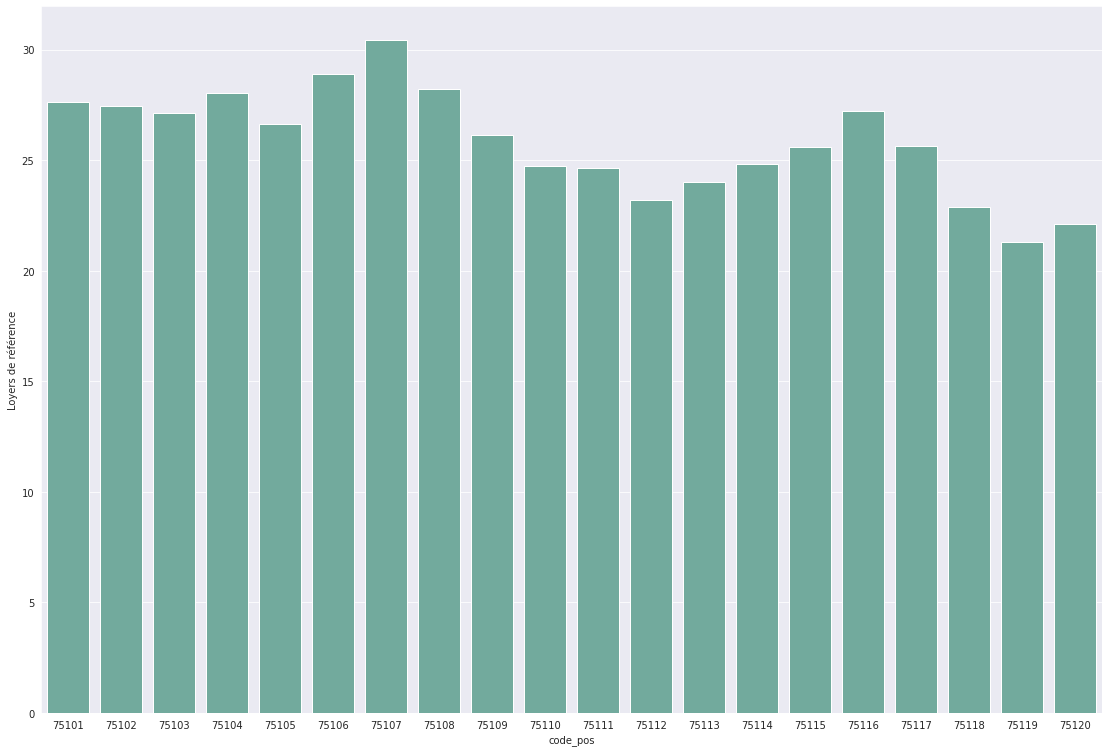

In [27]:
plt.figure(figsize=(19, 13))
sns.barplot(
    x='code_pos', 
    y='Loyers de référence', 
    data=df, 
     
    ci=None, 
    color='#69b3a2');

## Relation entre Année de construction du logement et prix de loyer

<AxesSubplot:xlabel='Epoque de construction', ylabel='Loyers de référence'>

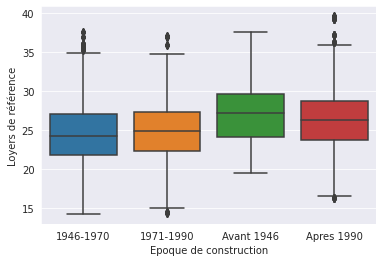

In [28]:
sns.boxplot(x="Epoque de construction", y="Loyers de référence", data=df)

In [29]:
rs = df.groupby('Epoque de construction')['Epoque de construction'].count()
print(rs)

Epoque de construction
1946-1970     2560
1971-1990     2560
Apres 1990    2560
Avant 1946    2560
Name: Epoque de construction, dtype: int64


<AxesSubplot:xlabel='Epoque de construction', ylabel='count'>

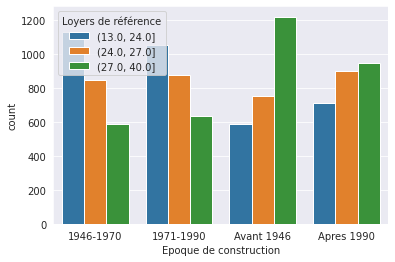

In [30]:
sns.countplot(x='Epoque de construction', hue = ss,data = df)

les logements qui ont été construit avant 1946 sont plus cher que ceux qui ont été construit entre 1946 et 1990; ceci peut-être expliqué par le fait qu'ils sont trés anciens et il y'avait des travaux de rénnovation qui ne sont pas mentionné dans notre jeux de données.